# Introduction
##### Concrete surface cracks are major defect in civil structures.Building Inspection which is done for the evaluation of rigidity and tensile strength of the building. Crack detection plays a major role in the building inspection, finding the cracks and determining the building health.

# Data

##### The datasets contains images of various concrete surfaces with and without crack. The image data are divided into two as negative (without crack) and positive (with crack) in separate folder for image classification. Each class has 20000images with a total of 40000 images with 227 x 227 pixels with RGB channels. The dataset is generated from 458 high-resolution images (4032x3024 pixel) with the method proposed by Zhang et al (2016). High resolution images found out to have high variance in terms of surface finish and illumination condition. No data augmentation in terms of random rotation or flipping or tilting is applied.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

### Unzip the folder

In [ ]:
import zipfile
import os
from pathlib import Path
import pandas as pd

# Define the path to the zip file and the extraction directory
zip_file_path = r"C:\Users\shash\OneDrive - University of Colombo\Desktop\archive.zip"
extraction_path = Path(r"C:\Users\shash\OneDrive - University of Colombo\Pictures\ConcreteImages")

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Verify the extraction
extracted_files = list(extraction_path.glob("**/*"))
print(f"Number of files extracted: {len(extracted_files)}")

### Organize the image paths and folders

In [7]:
import os
from pathlib import Path
import pandas as pd
extraction_path = Path(r"C:\Users\shash\OneDrive - University of Colombo\Pictures\ConcreteImages")

In [9]:
# Get all JPG file paths
Surface_JPG_Path = list(extraction_path.glob(r"**/*.jpg"))

# Extract labels from the folder names( Positive and Negative )
Surface_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], Surface_JPG_Path))

### Create dataframe

In [11]:
# Convert paths and labels to pandas Series
Surface_JPG_Path_Series = pd.Series(Surface_JPG_Path, name="JPG").astype(str)
Surface_Labels_Series = pd.Series(Surface_Labels, name="CATEGORY")

# Combine Series into a DataFrame
Main_Surface_Data = pd.concat([Surface_JPG_Path_Series, Surface_Labels_Series], axis=1)
print(Main_Surface_Data.head(-1))

                                                     JPG  CATEGORY
0      C:\Users\shash\OneDrive - University of Colomb...  Negative
1      C:\Users\shash\OneDrive - University of Colomb...  Negative
2      C:\Users\shash\OneDrive - University of Colomb...  Negative
3      C:\Users\shash\OneDrive - University of Colomb...  Negative
4      C:\Users\shash\OneDrive - University of Colomb...  Negative
...                                                  ...       ...
39994  C:\Users\shash\OneDrive - University of Colomb...  Positive
39995  C:\Users\shash\OneDrive - University of Colomb...  Positive
39996  C:\Users\shash\OneDrive - University of Colomb...  Positive
39997  C:\Users\shash\OneDrive - University of Colomb...  Positive
39998  C:\Users\shash\OneDrive - University of Colomb...  Positive

[39999 rows x 2 columns]


### Shuffle the images

In [13]:
# Shuffle the DataFrame
Main_Surface_Data = Main_Surface_Data.sample(frac=1).reset_index(drop=True)
print(Main_Surface_Data.head(-1))

                                                     JPG  CATEGORY
0      C:\Users\shash\OneDrive - University of Colomb...  Negative
1      C:\Users\shash\OneDrive - University of Colomb...  Positive
2      C:\Users\shash\OneDrive - University of Colomb...  Negative
3      C:\Users\shash\OneDrive - University of Colomb...  Positive
4      C:\Users\shash\OneDrive - University of Colomb...  Negative
...                                                  ...       ...
39994  C:\Users\shash\OneDrive - University of Colomb...  Positive
39995  C:\Users\shash\OneDrive - University of Colomb...  Negative
39996  C:\Users\shash\OneDrive - University of Colomb...  Negative
39997  C:\Users\shash\OneDrive - University of Colomb...  Negative
39998  C:\Users\shash\OneDrive - University of Colomb...  Positive

[39999 rows x 2 columns]


In [15]:
import cv2
import matplotlib.pyplot as plt

In [17]:
# Set the plot style to dark background
plt.style.use("dark_background")

# Separate the data into positive and negative samples
Positive_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Positive"]
Negative_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Negative"]

# Reset indices for both positive and negative samples
Positive_Surface = Positive_Surface.reset_index(drop=True)
Negative_Surface = Negative_Surface.reset_index(drop=True)

### Vision functions

In [19]:
# Define the simple vision function #Original image
def simple_vision(path):
    figure = plt.figure(figsize=(3, 3))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img, cv2.COLOR_BGR2RGB)
    
    plt.xlabel(str(Reading_Img.shape))
    plt.ylabel(str(Reading_Img.size))
    plt.imshow(Reading_Img)
    plt.show()

# Define the canny vision function
def canny_vision(path):
    figure = plt.figure(figsize=(3, 3))
    
    Reading_Img = cv2.imread(path)  # Read the image from the given path
    Reading_Img = cv2.cvtColor(Reading_Img, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB
    Canny_Img = cv2.Canny(Reading_Img, 90, 100)  # Apply Canny edge detection
    
    plt.xlabel(str(Canny_Img.shape))  # Set the x-axis label to the shape of the image
    plt.ylabel(str(Canny_Img.size))  # Set the y-axis label to the size of the image
    plt.imshow(Canny_Img)  # Display the edge-detected image
    plt.show()  # Show the plot

# Define the threshold vision function
def threshold_vision(path):
    figure = plt.figure(figsize=(3, 3))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img, cv2.COLOR_BGR2RGB)
    _, Threshold_Img = cv2.threshold(Reading_Img, 130, 255, cv2.THRESH_BINARY_INV)
    
    plt.xlabel(str(Threshold_Img.shape))
    plt.ylabel(str(Threshold_Img.size))
    plt.imshow(Threshold_Img)
    plt.show()

# Define the threshold and canny vision function
def threshold_canny(path):
    figure = plt.figure(figsize=(3, 3))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img, cv2.COLOR_BGR2RGB)
    _, Threshold_Img = cv2.threshold(Reading_Img, 130, 255, cv2.THRESH_BINARY_INV)
    Canny_Img = cv2.Canny(Threshold_Img, 90, 100)
    
    plt.xlabel(str(Canny_Img.shape))
    plt.ylabel(str(Canny_Img.size))
    plt.imshow(Canny_Img)
    plt.show()


Positive Sample 1


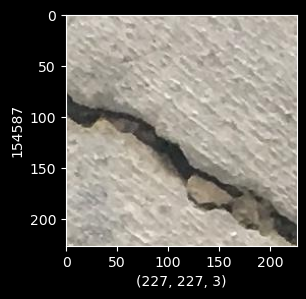

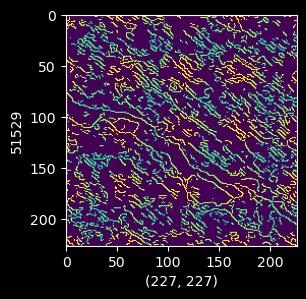

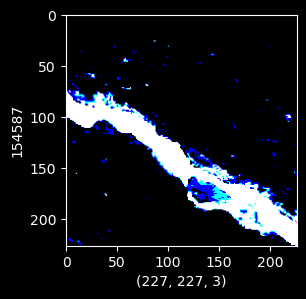

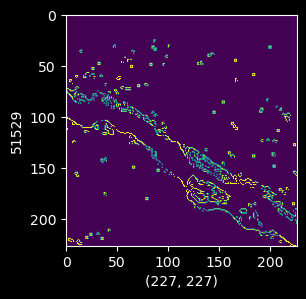

In [21]:
# Visualize some positive samples
for i in range(1):
    path = Positive_Surface.loc[i, 'JPG']
    print(f"Positive Sample {i+1}")
    simple_vision(path)
    canny_vision(path)
    threshold_vision(path)
    threshold_canny(path)

Negative Sample 1


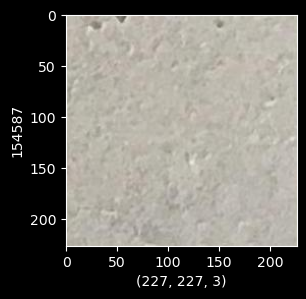

In [23]:
for i in range(1):
    path = Negative_Surface.loc[i, 'JPG']
    print(f"Negative Sample {i+1}")
    simple_vision(path)

### Simple vision

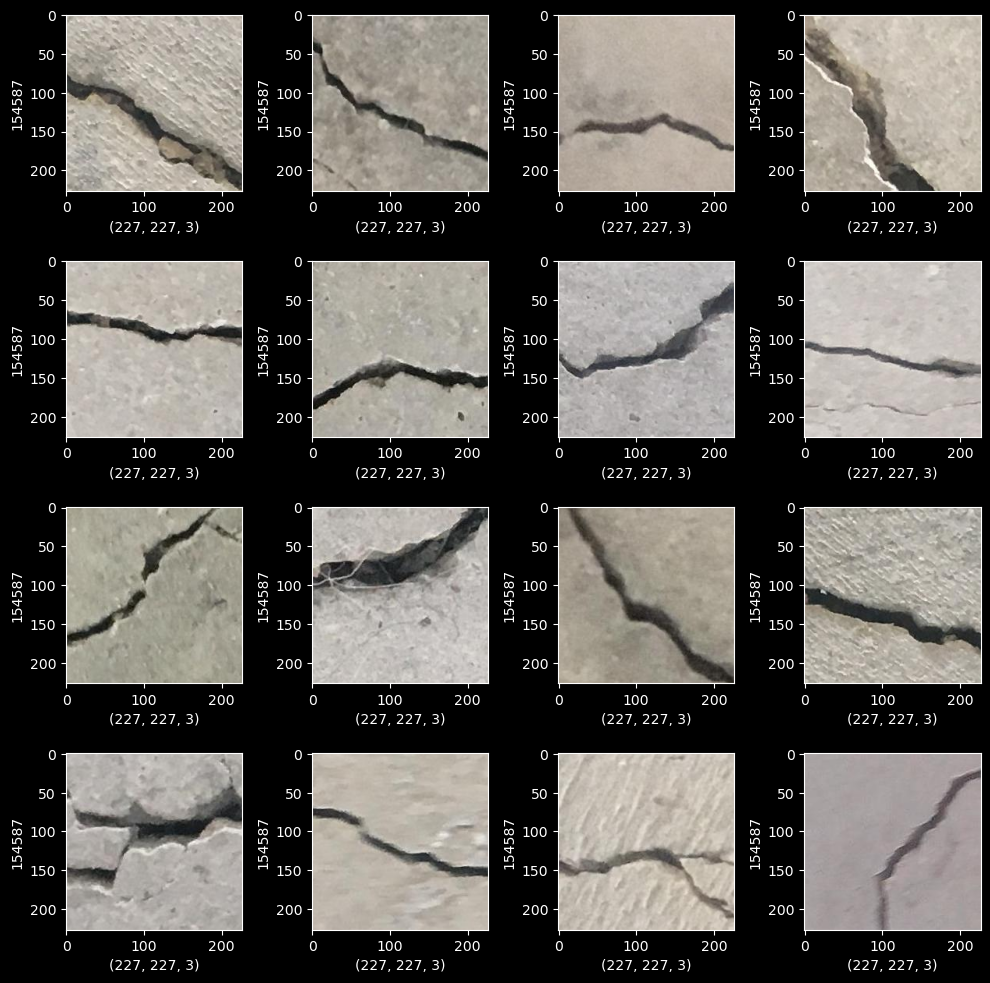

In [25]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    operations.set_xlabel(Reading_Img.shape)
    operations.set_ylabel(Reading_Img.size)
    operations.imshow(Reading_Img)
    
plt.tight_layout()
plt.show()

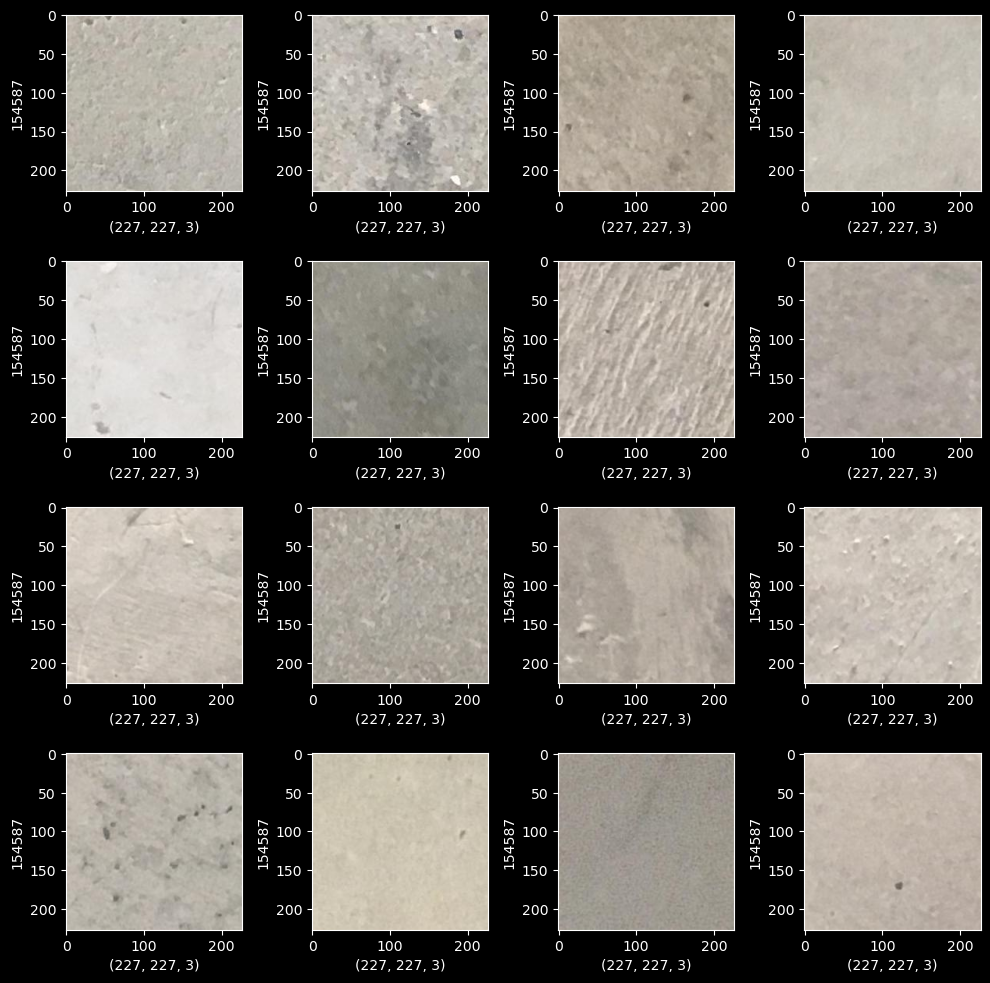

In [27]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Negative_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    operations.set_xlabel(Reading_Img.shape)
    operations.set_ylabel(Reading_Img.size)
    operations.imshow(Reading_Img)
    
plt.tight_layout()
plt.show()


### Canny vision

Purpose: Detects edges within an image, where an edge is a significant change in pixel intensity.
Importance:
Feature Extraction: Provides valuable information about object boundaries and shapes.
Object Recognition: Enables the identification and localization of objects in images.
Preprocessing: Often used as a preprocessing step for tasks like object detection, image segmentation, and image registration.
Quality Control: Useful in industrial applications for detecting defects or anomalies on surfaces.on.


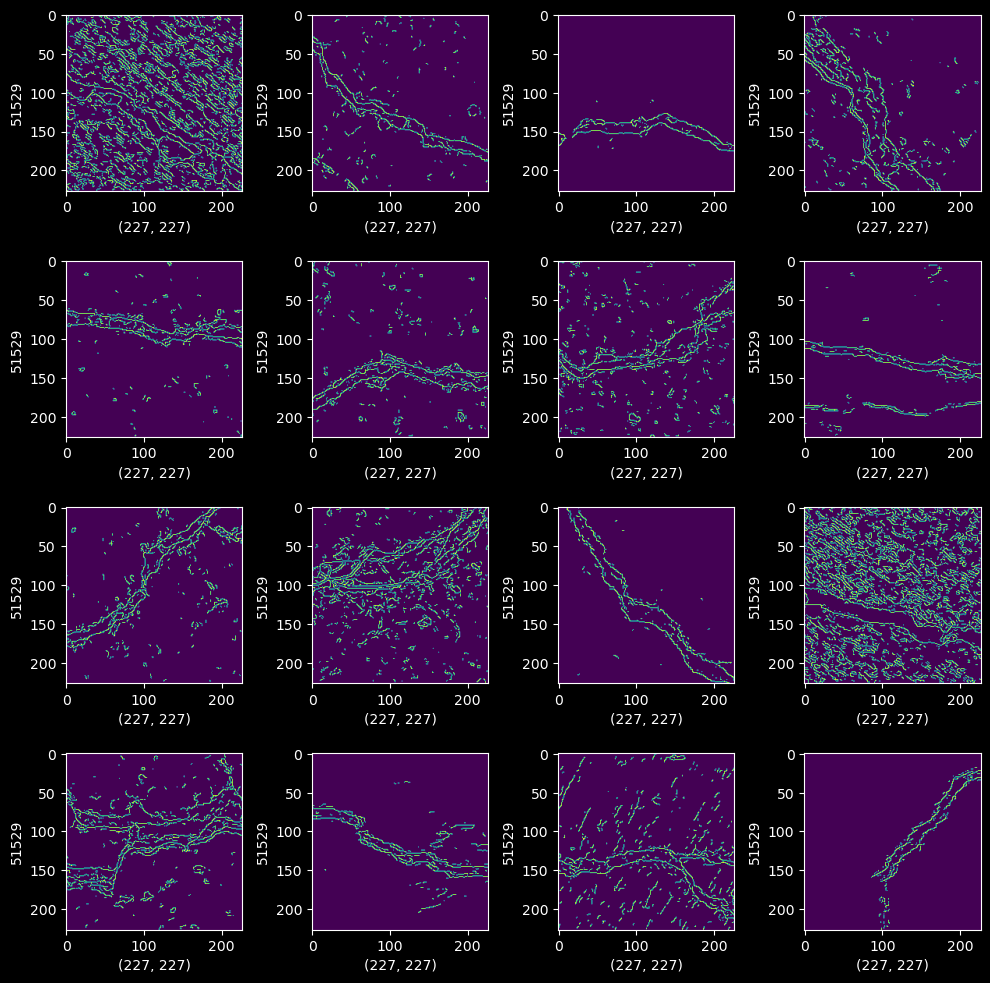

In [29]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    Canny_Img = cv2.Canny(Reading_Img,90,100)
    
    operations.set_xlabel(Canny_Img.shape)
    operations.set_ylabel(Canny_Img.size)
    operations.imshow(Canny_Img)
    
plt.tight_layout()
plt.show()

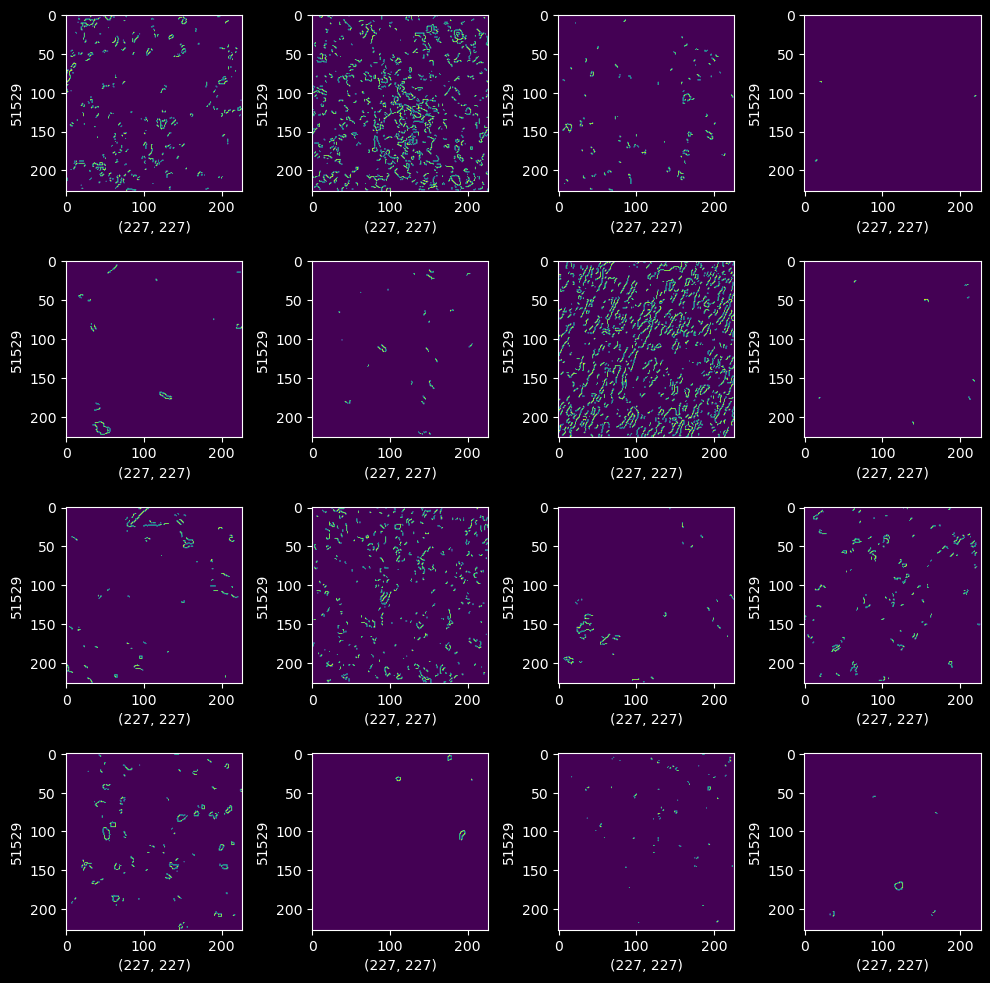

In [31]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Negative_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    Canny_Img = cv2.Canny(Reading_Img,90,100)
    
    operations.set_xlabel(Canny_Img.shape)
    operations.set_ylabel(Canny_Img.size)
    operations.imshow(Canny_Img)
    
plt.tight_layout()
plt.show()


### Threshold vision

Purpose: Thresholding is used to simplify visual data for further analysis by converting grayscale or color images into binary images (black and white).
Importance:
Segmentation: It separates objects from the background by setting pixels above or below a certain intensity threshold to specific values (e.g., 0 and 255 in binary images).
Feature Extraction: Helps in isolating regions of interest based on pixel intensity, making it easier to detect edges and shapes.
Noise Reduction: Can reduce noise in images, especially when combined with smoothing techniques.

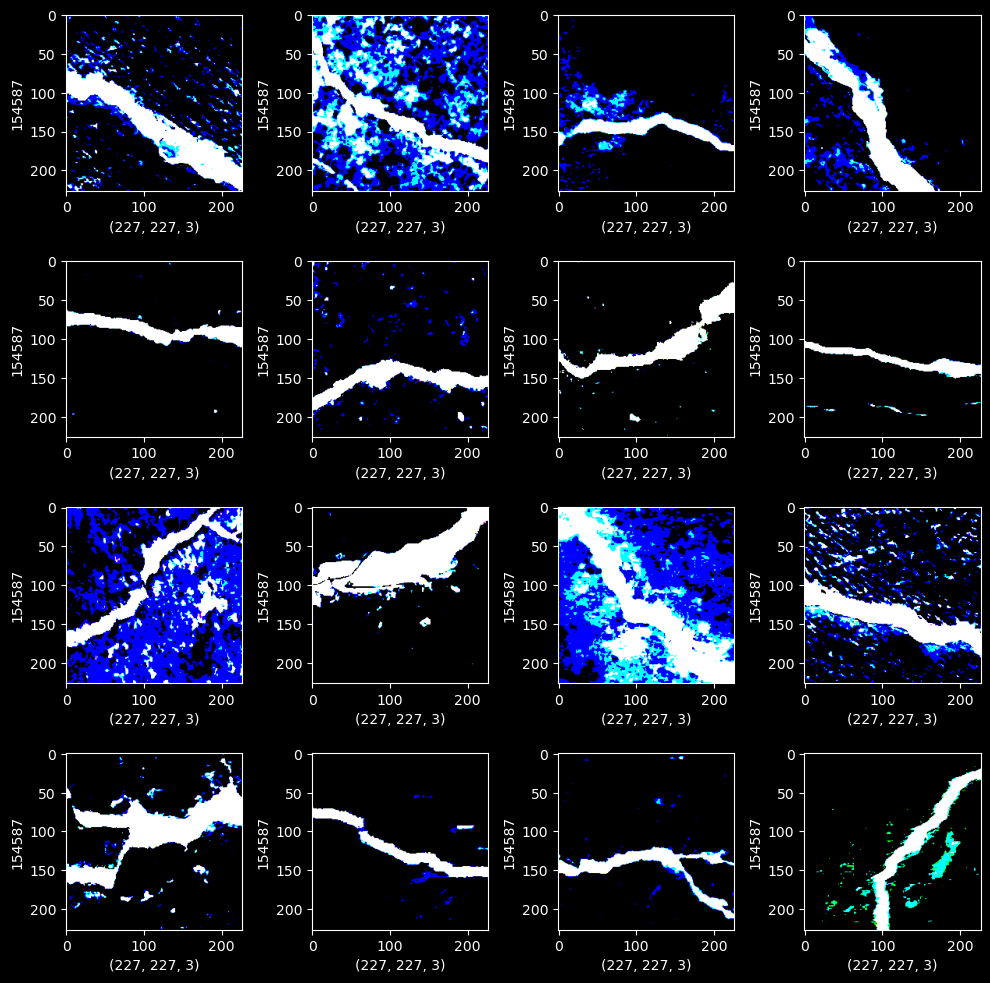

In [33]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    
    operations.set_xlabel(Threshold_Img.shape)
    operations.set_ylabel(Threshold_Img.size)
    operations.imshow(Threshold_Img)
    
plt.tight_layout()
plt.show()


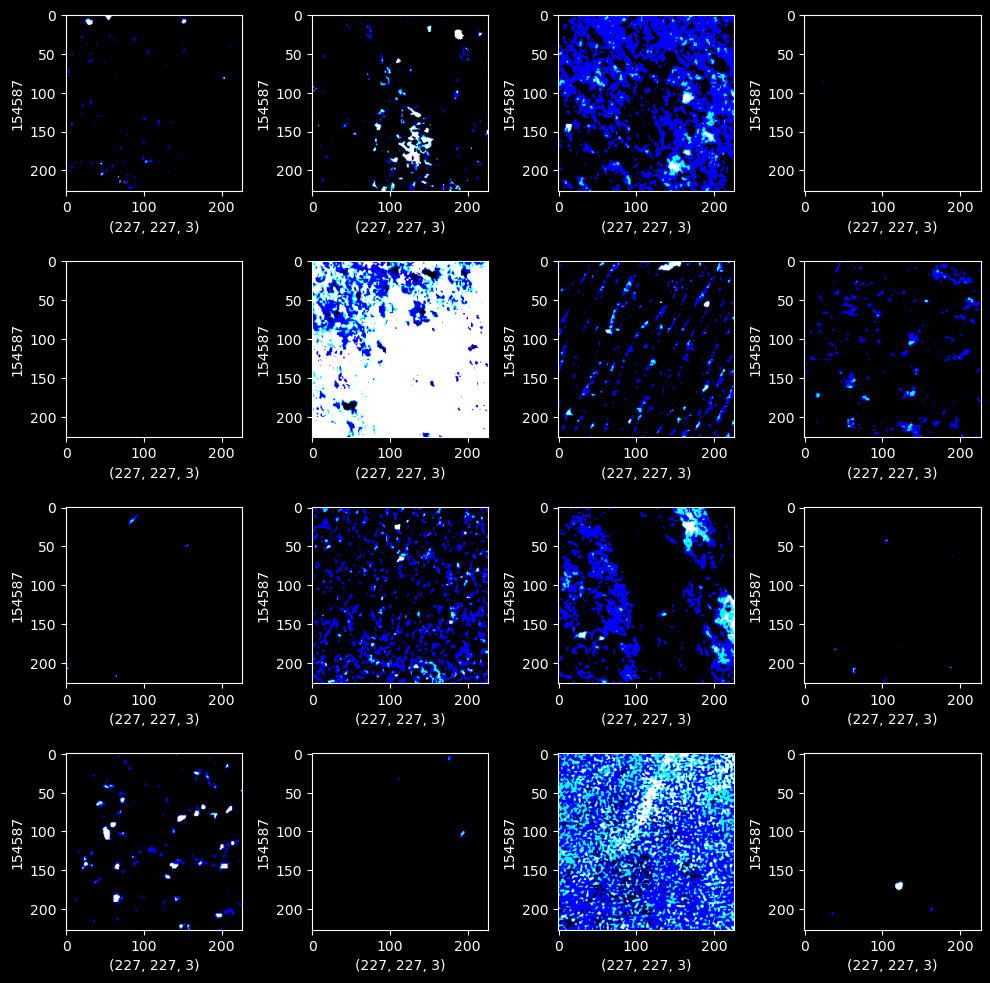

In [35]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Negative_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    
    operations.set_xlabel(Threshold_Img.shape)
    operations.set_ylabel(Threshold_Img.size)
    operations.imshow(Threshold_Img)
    
plt.tight_layout()
plt.show()


### Combine canny and threshold vision

Purpose:
•	To first simplify the image using thresholding and then detect edges within the simplified image.
Why Use It:
•	Enhanced Edge Detection: Thresholding can help in reducing noise and irrelevant details in the image before applying edge detection. This can lead to more accurate and cleaner edge detection results.
•	Focus on Key Features: By combining these techniques, you can focus on the most relevant parts of the image (e.g., cracks) and ignore less important details.


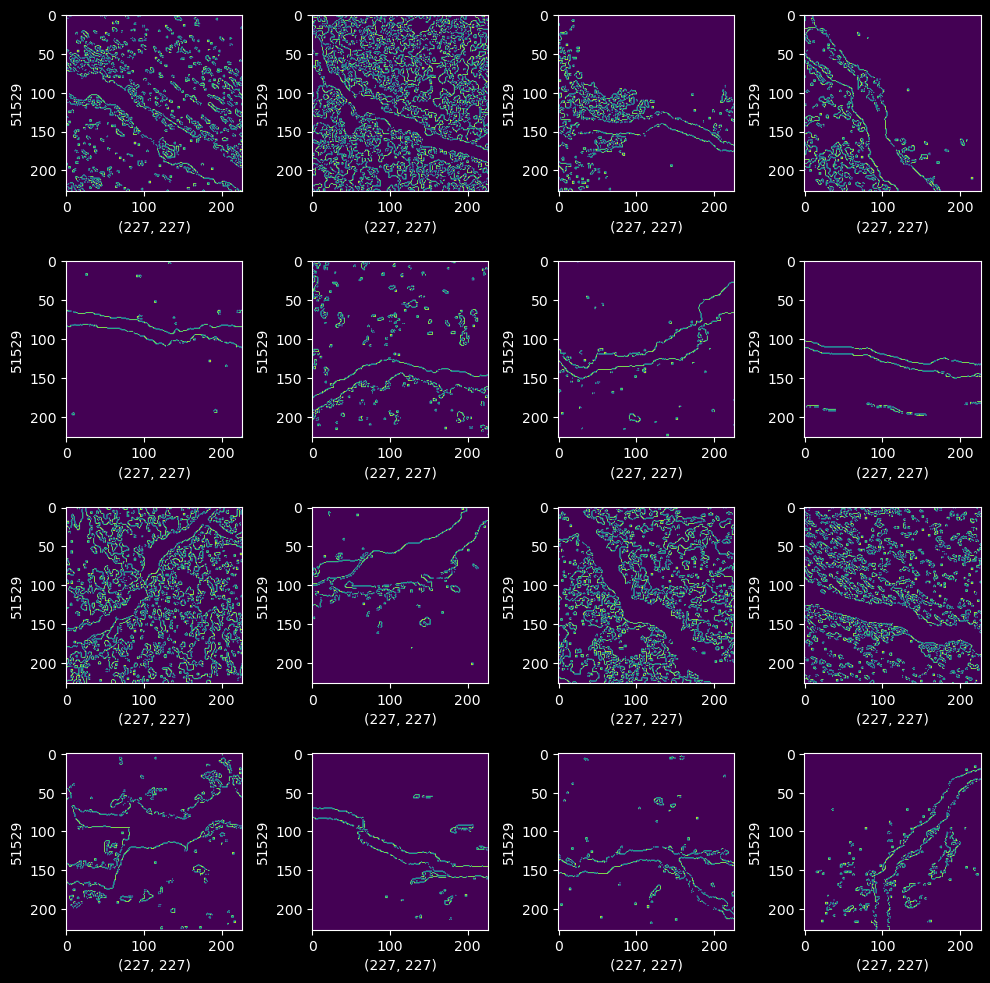

In [37]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    Canny_Img = cv2.Canny(Threshold_Img,90,100)
    
    operations.set_xlabel(Canny_Img.shape)
    operations.set_ylabel(Canny_Img.size)
    operations.imshow(Canny_Img)
    
plt.tight_layout()
plt.show()

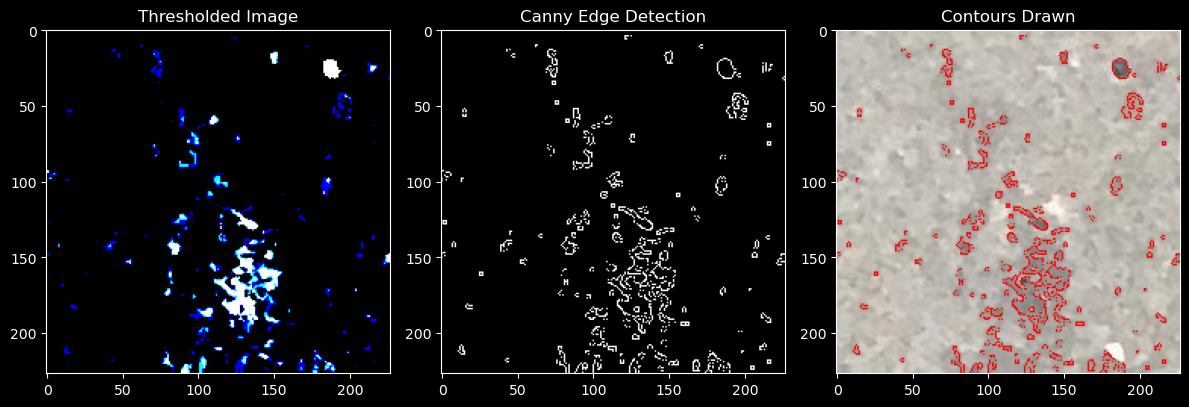

In [39]:
# Assuming Main_Surface_Data["JPG"][2] contains the path to your image
Reading_Img = cv2.imread(Main_Surface_Data["JPG"][2])  # Read the image from the specified path
Reading_Img = cv2.cvtColor(Reading_Img, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB

# Apply binary thresholding to the image
_, Threshold_Img = cv2.threshold(Reading_Img, 150, 255, cv2.THRESH_BINARY_INV)

# Apply Canny edge detection to the thresholded image
Canny_Img = cv2.Canny(Threshold_Img, 90, 100)

# Find contours in the Canny edge-detected image
contours, _ = cv2.findContours(Canny_Img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original RGB image
Draw_Contours = cv2.drawContours(Reading_Img.copy(), contours, -1, (255, 0, 0), 1)

# Create a figure with 1 row and 3 columns for subplots, each of size 12x12 inches
figure, axis = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))

# Display the thresholded image in the first subplot
axis[0].imshow(Threshold_Img, cmap='gray')  # Use grayscale colormap for better visualization
axis[0].set_title('Thresholded Image')  # Set the title for the subplot

# Display the Canny edge-detected image in the second subplot
axis[1].imshow(Canny_Img, cmap='gray')  # Use grayscale colormap for better visualization
axis[1].set_title('Canny Edge Detection')  # Set the title for the subplot

# Display the original image with contours drawn in the third subplot
axis[2].imshow(Draw_Contours)  # Show the image with drawn contours
axis[2].set_title('Contours Drawn')  # Set the title for the subplot

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()  # Display the plot

### Countours detection

Purpose: Identifies and represents the boundaries of objects or shapes in an image.
Importance:
Shape Analysis: Allows quantification of shape characteristics such as area, perimeter, and orientation.
Object Recognition: Contours can serve as a feature for recognizing and classifying objects.
Region of Interest (ROI) Extraction: Defines areas where further analysis or processing is required, such as in medical imaging or autonomous navigation systems.
Image Understanding: Provides a structured representation of objects in an image, aiding in higher-level understanding and interpretation.

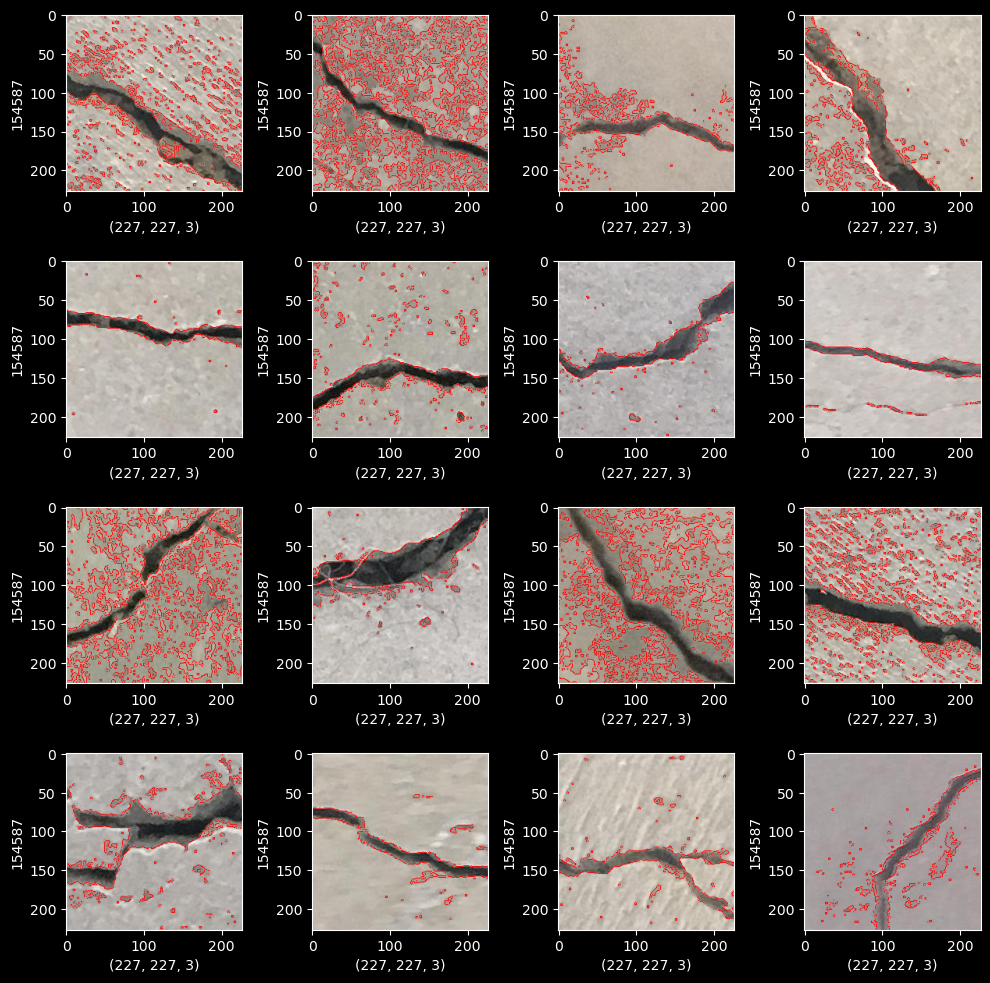

In [41]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    Canny_Img = cv2.Canny(Threshold_Img,90,100)
    contours,_ = cv2.findContours(Canny_Img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    Draw_Contours_Positive = cv2.drawContours(Reading_Img,contours,-1,(255,0,0),1)
    
    operations.set_xlabel(Draw_Contours_Positive.shape)
    operations.set_ylabel(Draw_Contours_Positive.size)
    operations.imshow(Draw_Contours_Positive)
    
plt.tight_layout()
plt.show()

### Thresholding Followed by Skeletonization

Skeletonization thins binary shapes iteratively until they become one-pixel-wide lines that represent the centers of the original shapes. 
In many applications, thresholding is applied first to segment an image and highlight regions of interest. Then, skeletonization can be applied to these binary images to extract the essential shape information while discarding unnecessary details.

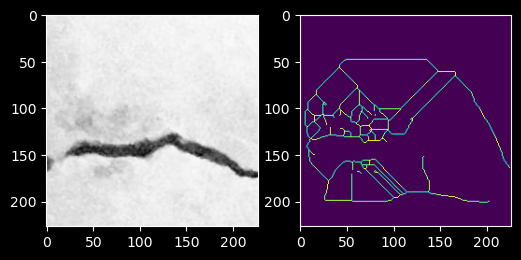

In [43]:
import numpy as np
import skimage.morphology

figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(6,6))

Reading_Img = cv2.imread(Positive_Surface["JPG"][2])
Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2GRAY)
_,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)

Array_Img = np.array(Reading_Img > Threshold_Img).astype(int)
Skeleton_Morphology_Img = skimage.morphology.skeletonize(Array_Img)

axis[0].imshow(Reading_Img,cmap="Greys_r")
axis[1].imshow(Skeleton_Morphology_Img)

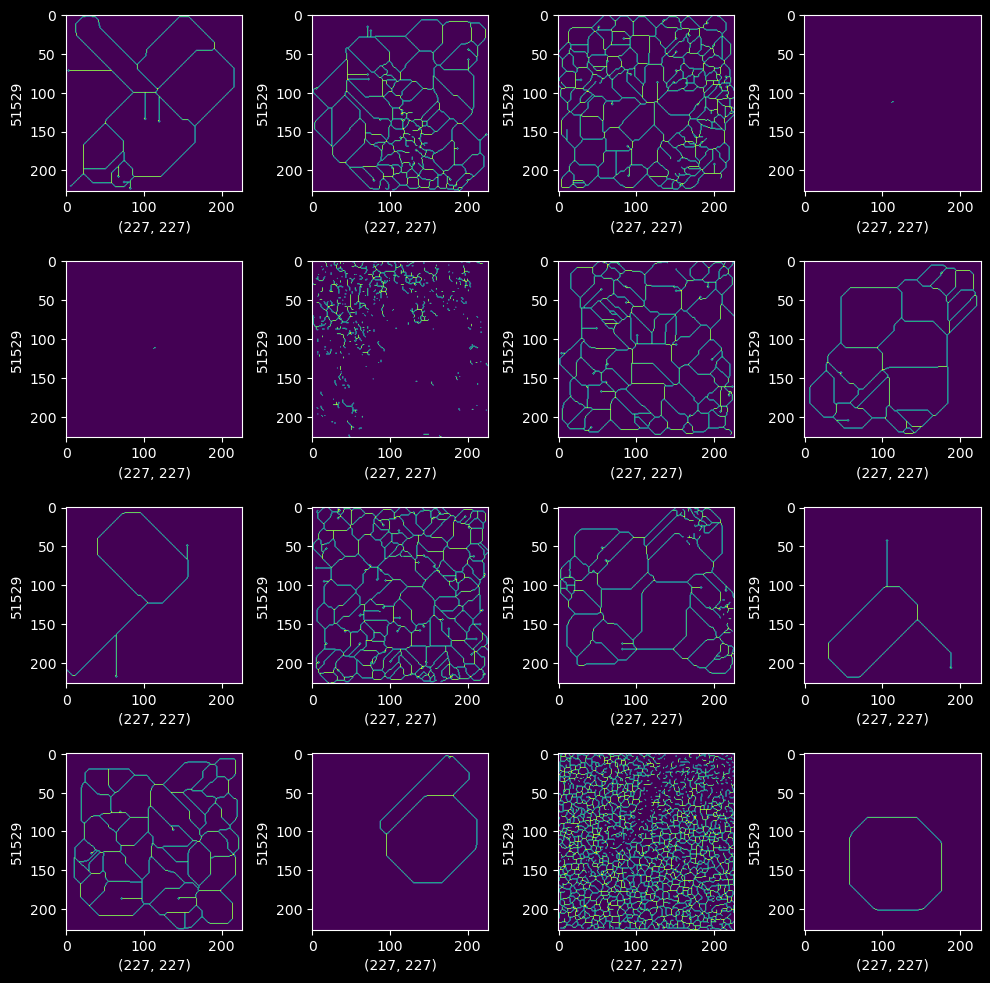

In [45]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Negative_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2GRAY)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    Array_Img = np.array(Reading_Img > Threshold_Img).astype(int)
    Skeleton_Morphology_Img = skimage.morphology.skeletonize(Array_Img)
    
    operations.set_xlabel(Skeleton_Morphology_Img.shape)
    operations.set_ylabel(Skeleton_Morphology_Img.size)
    operations.imshow(Skeleton_Morphology_Img)
    
plt.tight_layout()
plt.show()

### Canny vision followed by skeltonization

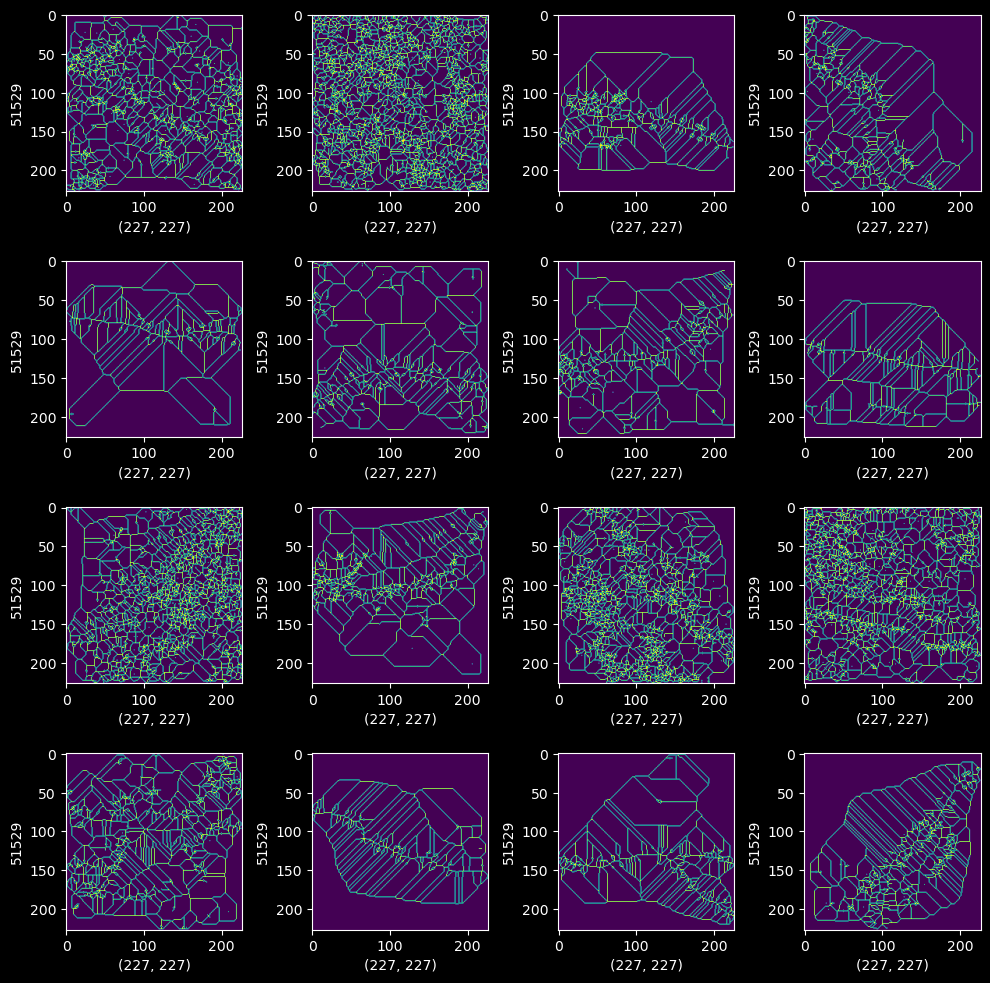

In [47]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(Positive_Surface["JPG"][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2GRAY)
    
    _,Threshold_Img = cv2.threshold(Reading_Img,150,255,cv2.THRESH_BINARY_INV)
    Canny_Img = cv2.Canny(Threshold_Img,90,100)
    Array_Img = np.array(Reading_Img > Canny_Img).astype(int)
    Skeleton_Morphology_Img = skimage.morphology.skeletonize(Array_Img)
    
    operations.set_xlabel(Skeleton_Morphology_Img.shape)
    operations.set_ylabel(Skeleton_Morphology_Img.size)
    operations.imshow(Skeleton_Morphology_Img)
    
plt.tight_layout()
plt.show()


### Train test split

In [49]:
from sklearn.model_selection import train_test_split

# Splitting the data
xTrain, xTest = train_test_split(Main_Surface_Data, train_size=0.75, test_size=0.25, shuffle=True, random_state=42)

# Printing shapes to verify
print(xTrain.shape)
print(xTest.shape)

(30000, 2)
(10000, 2)


#### ImageDataGenerator is used for both training and testing datasets. It allows for real-time data augmentation and normalization.

In [55]:
import tensorflow as tf

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:

# Define ImageDataGenerator for training with augmentation and validation split
Train_IMG_Generator = ImageDataGenerator(
    rescale=1./255,                   # Rescale pixel values to [0, 1] for normalization
    rotation_range=25,                # Range for random rotations (degrees)
    shear_range=0.5,                  # Shear intensity range
    zoom_range=0.5,                   # Range for random zoom
    width_shift_range=0.2,            # Range for horizontal shift
    height_shift_range=0.2,           # Range for vertical shift
    brightness_range=[0.6, 0.9],      # Range for brightness adjustment
    vertical_flip=True,               # Randomly flip inputs vertically
    validation_split=0.1              # Fraction of data to reserve for validation
)

# Define ImageDataGenerator for testing without augmentation
Test_IMG_Generator = ImageDataGenerator(rescale=1./255)

Rescale: Normalizes pixel values to the range [0, 1], which helps in training neural networks more effectively.
Rotation Range: Randomly rotates images within the range of -25 to +25 degrees during training, which helps in making the model more robust to rotated inputs.
Shear Range: Applies shear transformations to stretch or skew the image along the horizontal or vertical axis, enhancing the variety of training data.
Zoom Range: Randomly zooms into the image up to 50%, adding variability to the scale of objects in the image.
Shift Range: Randomly shifts the image horizontally and vertically by up to 20%, increasing the diversity of training examples.
Brightness Range: Randomly adjusts the brightness of the image within the specified range, making the model more adaptable to varying lighting conditions.
Vertical Flip: Randomly flips images vertically, introducing another form of data augmentation.
Validation Split: Specifies that 10% of the training data will be reserved for validation, ensuring that the model's performance can be monitored on unseen data during training.

In [61]:
# Convert CATEGORY column to strings if necessary
xTrain['CATEGORY'] = xTrain['CATEGORY'].astype(str)
xTest['CATEGORY'] = xTest['CATEGORY'].astype(str)

In [65]:
Train_Set = Train_IMG_Generator.flow_from_dataframe(
    dataframe=xTrain,
    x_col="JPG",
    y_col="CATEGORY",
    color_mode="rgb",
    class_mode="binary",
    target_size=(200, 200),
    subset="training",
    batch_size=32,
    seed=42
)

Validation_Set = Train_IMG_Generator.flow_from_dataframe(
    dataframe=xTrain,
    x_col="JPG",
    y_col="CATEGORY",
    color_mode="rgb",
    class_mode="binary",
    target_size=(200, 200),
    subset="validation",
    batch_size=32,
    seed=42
)

Test_Set = Test_IMG_Generator.flow_from_dataframe(
    dataframe=xTest,
    x_col="JPG",
    y_col="CATEGORY",
    color_mode="rgb",
    class_mode="binary",
    target_size=(200, 200),
    batch_size=32,
    seed=42
)


Found 27000 validated image filenames belonging to 2 classes.
Found 3000 validated image filenames belonging to 2 classes.
Found 10000 validated image filenames belonging to 2 classes.


In [67]:
# Checking data shapes and classes
print("TRAIN:")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---" * 20)
print("VALIDATION:")
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)
print("---" * 20)
print("TEST:")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN:
{'Negative': 0, 'Positive': 1}
[1, 0, 0, 0, 0]
(200, 200, 3)
------------------------------------------------------------
VALIDATION:
{'Negative': 0, 'Positive': 1}
[1, 1, 1, 0, 1]
(200, 200, 3)
------------------------------------------------------------
TEST:
{'Negative': 0, 'Positive': 1}
[0, 1, 0, 0, 0]
(200, 200, 3)


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [71]:
# Model parameters
print("MODEL PARAMETERS:")
input_dim = (Train_Set.image_shape[0], Train_Set.image_shape[1], Train_Set.image_shape[2])
class_dim = 1  # Assuming binary classification

MODEL PARAMETERS:


### Model architecture

### Compile the model

In [77]:
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",input_shape=input_dim))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Flatten())
Model.add(Dense(1024,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(class_dim,activation="sigmoid"))

Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=["accuracy"])
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      epochs=1)


C:\Users\shash\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\shash\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


844/844 ━━━━━━━━━━━━━━━━━━━━ 1431s 2s/step - accuracy: 0.9142 - loss: 0.4587 - val_accuracy: 0.9823 - val_loss: 0.0848


### Testing

In [80]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

C:\Users\shash\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 302ms/step - accuracy: 0.9800 - loss: 0.0791
LOSS:  0.0807
ACCURACY:  0.98


In [82]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)
print(Model_Test_Prediction)

313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 290ms/step
[0 0 0 ... 0 0 0]


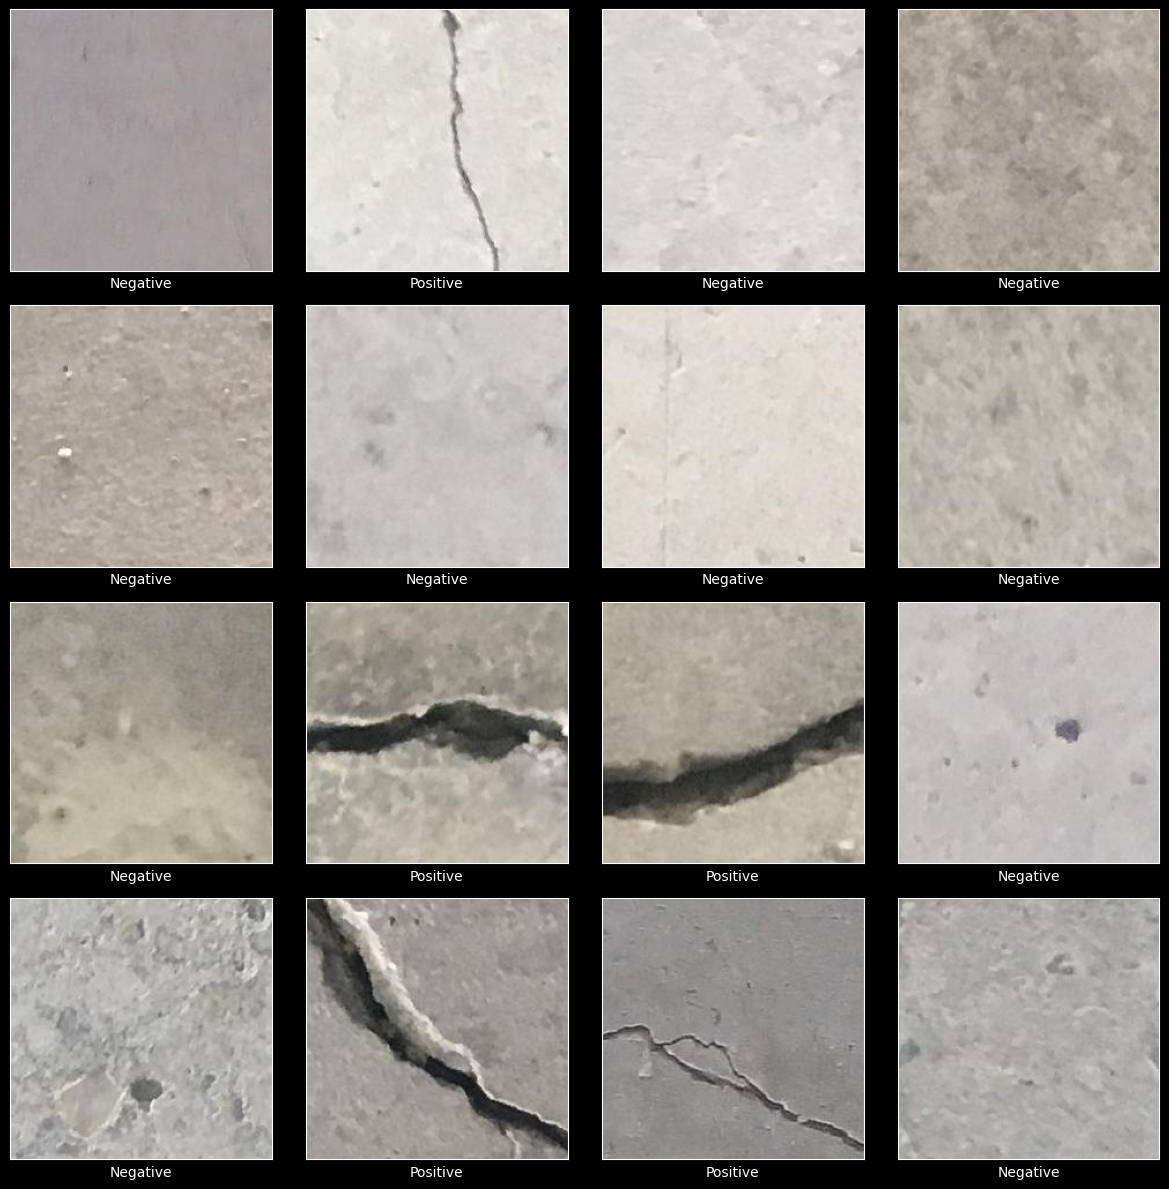

In [88]:
fig, axes = plt.subplots(nrows=4,
                         ncols=4,
                         figsize=(12, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(xTest["JPG"].iloc[i]))
    ax.set_xlabel(xTest["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()